In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier


In [4]:
Trained_Images_Path = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/test"
Test_Images_Path = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/Evaluate"

Trained_Image_Folders = os.listdir(Trained_Images_Path)
Trained_Images = []

# Load all training imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Trained_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Trained_Images.append((img_arr_flat, Trained_Image_Folders.index(x)))

random.shuffle(Trained_Images)
# Prepare X and Y for training data
X = [item[0] for item in Trained_Images]
Y = [item[1] for item in Trained_Images]



100%|██████████| 1000/1000 [00:12<00:00, 81.45it/s]


In [5]:
Test_data = []

# Load all testing imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Test_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Test_data.append((img_arr_flat, Trained_Image_Folders.index(x)))
random.shuffle(Test_data)

100%|██████████| 15/15 [00:00<00:00, 404.39it/s]


In [6]:
# Initialize a list to store the results
manhattan_avg_accuracy_results = []
euclidean_avg_accuracy_results = []

# Define a range of K values to experiment with
k_values = [1, 3, 5, 7, 9]

# Perform 5-fold cross-validation for each K value using Manhattan and Euclidean distances
for k in tqdm(k_values):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # Manhattan distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)  # Euclidean distance

    # Perform cross-validation for both distance metrics
    kfold = KFold(n_splits=5)  # Define the cross-validation method
    scores_manhattan = cross_val_score(knn_manhattan, X, Y, cv=kfold)
    scores_euclidean = cross_val_score(knn_euclidean, X, Y, cv=kfold)

    manhattan_avg_accuracy_results.append(np.mean(scores_manhattan))
    euclidean_avg_accuracy_results.append(np.mean(scores_euclidean))

100%|██████████| 5/5 [08:06<00:00, 97.31s/it]


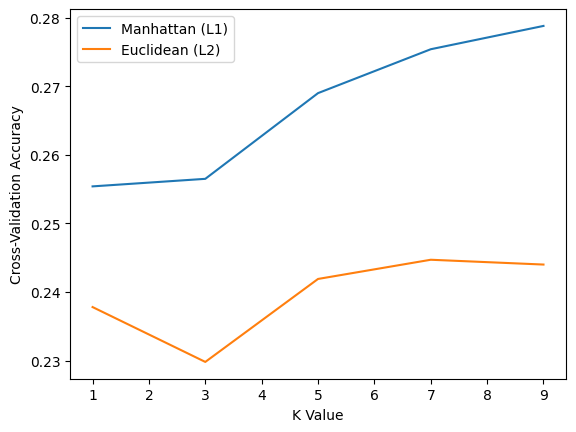

K = 1, Manhattan Accuracy: 0.2554, Euclidean Accuracy: 0.23779999999999996
K = 3, Manhattan Accuracy: 0.2565, Euclidean Accuracy: 0.2298
K = 5, Manhattan Accuracy: 0.269, Euclidean Accuracy: 0.2419
K = 7, Manhattan Accuracy: 0.27540000000000003, Euclidean Accuracy: 0.2447
K = 9, Manhattan Accuracy: 0.27880000000000005, Euclidean Accuracy: 0.24399999999999994


In [7]:
# Plot the results
plt.plot(k_values, manhattan_avg_accuracy_results, label='Manhattan (L1)')
plt.plot(k_values, euclidean_avg_accuracy_results, label='Euclidean (L2)')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

# Print additional data and compare the results:
for i, k in enumerate(k_values):
    print(f"K = {k}, Manhattan Accuracy: {manhattan_avg_accuracy_results[i]}, Euclidean Accuracy: {euclidean_avg_accuracy_results[i]}")

# Discussion:

After performing 5-fold cross-validation, we observed that the k-nearest neighbors (K-NN) algorithm demonstrated varying degrees of accuracy with different K values. The Manhattan (L1) and Euclidean (L2) distances showed distinct performance metrics, with Manhattan consistently outperforming Euclidean as K increased from 1 to 9. Specifically, the Manhattan accuracy ranged from 0.2554 to 0.2788, while the Euclidean accuracy ranged from 0.2378 to 0.2447 for the corresponding K values.

Manhattan (L1) distance is known for its robustness in handling outliers and its effectiveness in high-dimensional feature spaces. Particularly suited for the grayscale CIFAR-10 dataset, it efficiently captures pixel intensity variations critical for distinguishing objects in the images, even in the presence of noisy or inconsistent data points. Conversely, Euclidean (L2) distance considers both the magnitude and direction of differences between data points and is more suitable for datasets with correlations or geometric structures. However, its sensitivity to outliers and potential limitations in high-dimensional spaces make it less ideal for this specific dataset.

The code successfully applies the k-NN algorithm for image classification on the CIFAR-10 dataset, employing cross-validation for robust evaluation and visualization of results to understand the impact of different hyperparameters. Although the images were converted to grayscale for faster processing, the 1D flattening of images might lead to information loss. The initial predictions were accurate, but subsequent predictions were not. The implementation relied on fundamental image preprocessing techniques, highlighting the potential for improvement through advanced feature engineering methods such as edge detection, texture extraction, or deep feature learning. Generating additional training data using suitable techniques could enhance the model's generalization and robustness, especially when dealing with limited datasets.

In conclusion, the analysis suggests that Manhattan (L1) distance is more suitable for the grayscale CIFAR-10 dataset. However, further exploration of alternative distance metrics, feature engineering, and advanced algorithms is crucial to maximize classification accuracy and fully utilize the dataset's potential.

0it [00:00, ?it/s]

Originial Image 1: 7
Top 5 Predictions:
1: Class 7
2: Class 9
3: Class 9
4: Class 9
5: Class 2




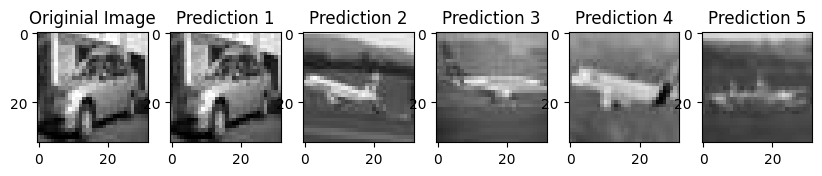

1it [00:00,  1.39it/s]

Originial Image 2: 3
Top 5 Predictions:
1: Class 3
2: Class 0
3: Class 3
4: Class 6
5: Class 4




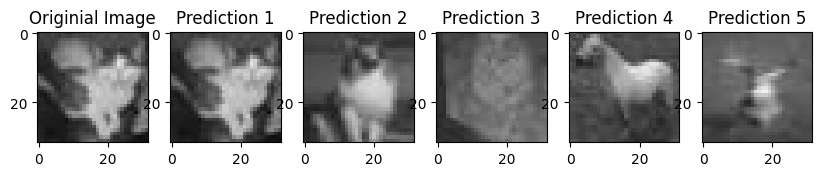

2it [00:01,  1.27it/s]

Originial Image 3: 6
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 2
4: Class 1
5: Class 2




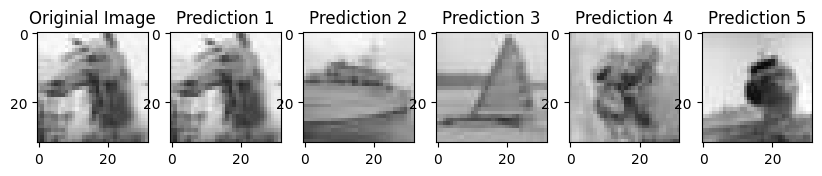

3it [00:02,  1.32it/s]

Originial Image 4: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 1
4: Class 1
5: Class 4




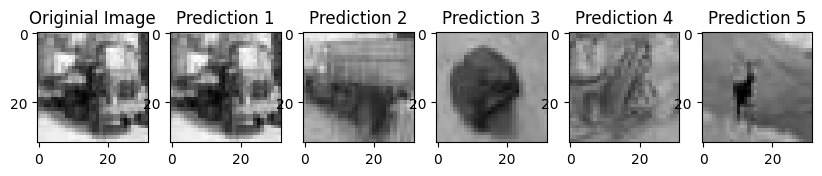

4it [00:03,  1.34it/s]

Originial Image 5: 7
Top 5 Predictions:
1: Class 7
2: Class 9
3: Class 4
4: Class 9
5: Class 2




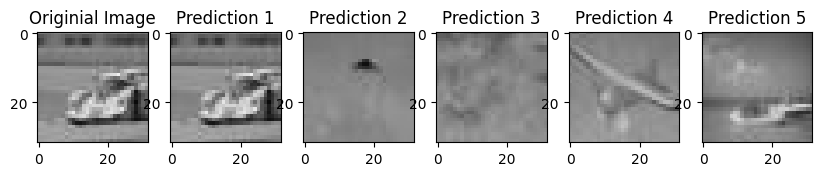

5it [00:03,  1.34it/s]

Originial Image 6: 6
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 9
4: Class 4
5: Class 2




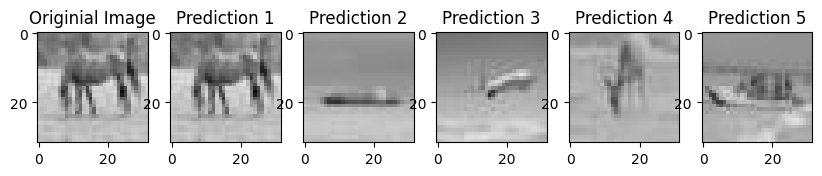

6it [00:04,  1.34it/s]

Originial Image 7: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 2
4: Class 8
5: Class 6




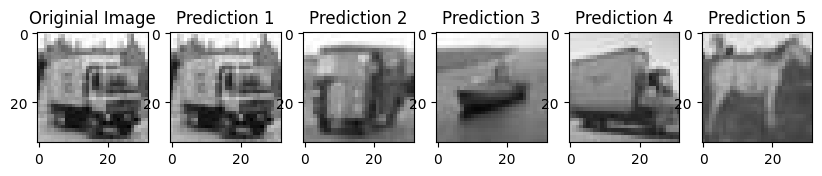

7it [00:05,  1.29it/s]

Originial Image 8: 7
Top 5 Predictions:
1: Class 7
2: Class 7
3: Class 2
4: Class 9
5: Class 4




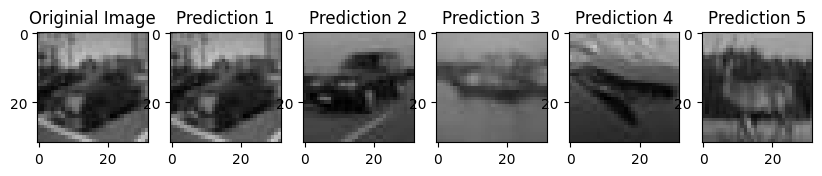

8it [00:06,  1.32it/s]

Originial Image 9: 5
Top 5 Predictions:
1: Class 5
2: Class 7
3: Class 1
4: Class 4
5: Class 4




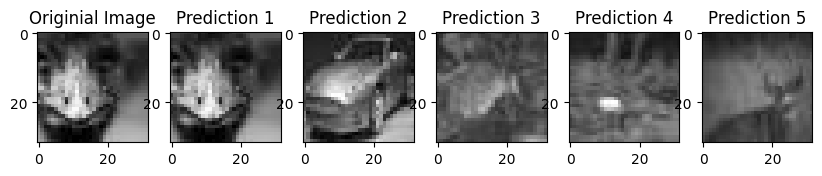

9it [00:06,  1.34it/s]

Originial Image 10: 5
Top 5 Predictions:
1: Class 5
2: Class 4
3: Class 4
4: Class 5
5: Class 4




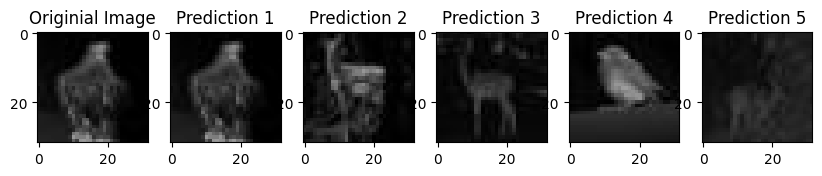

10it [00:07,  1.34it/s]

Originial Image 11: 5
Top 5 Predictions:
1: Class 5
2: Class 0
3: Class 0
4: Class 6
5: Class 4




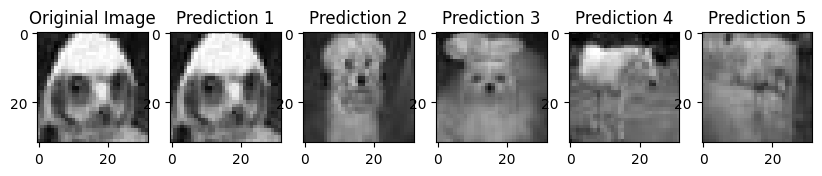

11it [00:08,  1.25it/s]

Originial Image 12: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 2
4: Class 5
5: Class 9




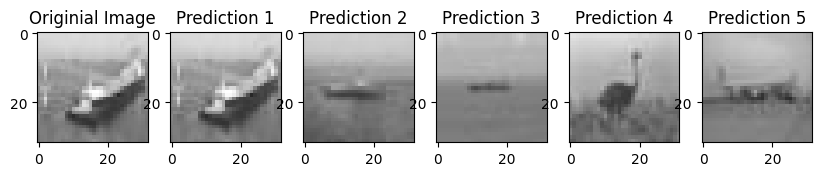

12it [00:09,  1.13it/s]

Originial Image 13: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 3
4: Class 9
5: Class 8




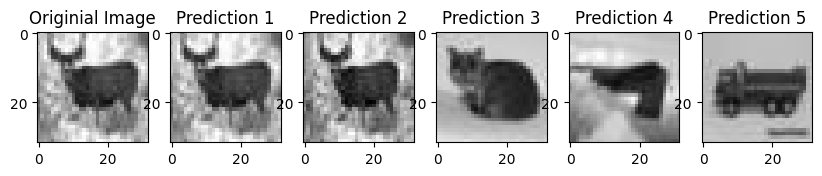

13it [00:10,  1.00s/it]

Originial Image 14: 7
Top 5 Predictions:
1: Class 7
2: Class 2
3: Class 3
4: Class 9
5: Class 6




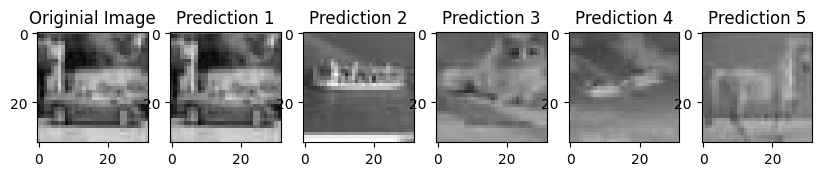

14it [00:11,  1.04s/it]

Originial Image 15: 0
Top 5 Predictions:
1: Class 0
2: Class 3
3: Class 9
4: Class 1
5: Class 3




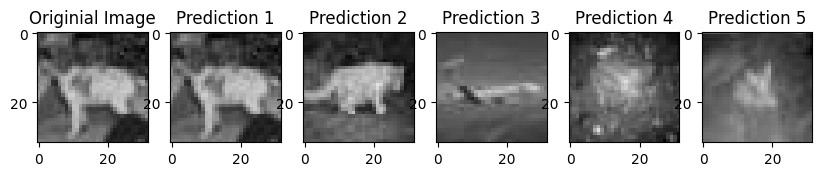

15it [00:12,  1.01it/s]

Originial Image 16: 7
Top 5 Predictions:
1: Class 7
2: Class 6
3: Class 7
4: Class 7
5: Class 1




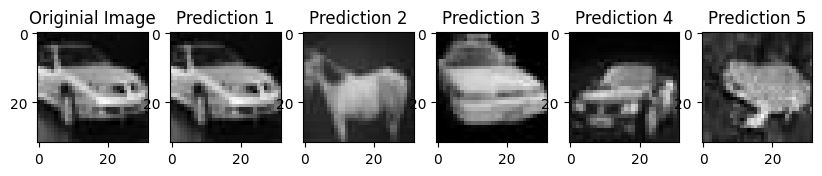

16it [00:13,  1.09it/s]

Originial Image 17: 7
Top 5 Predictions:
1: Class 7
2: Class 4
3: Class 1
4: Class 5
5: Class 1




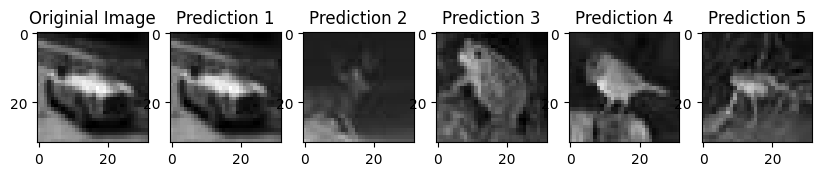

17it [00:14,  1.16it/s]

Originial Image 18: 6
Top 5 Predictions:
1: Class 6
2: Class 6
3: Class 1
4: Class 6
5: Class 6




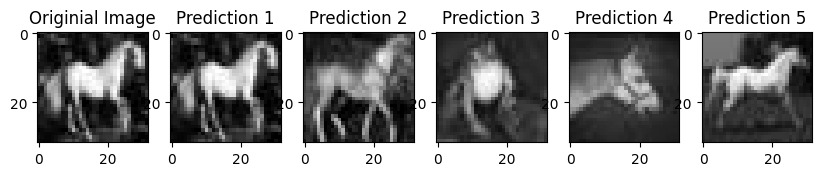

18it [00:15,  1.16it/s]

Originial Image 19: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 5
4: Class 9
5: Class 5




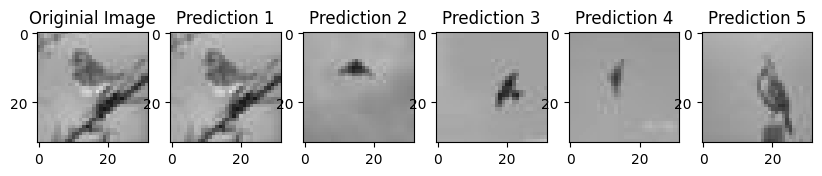

19it [00:15,  1.21it/s]

Originial Image 20: 9
Top 5 Predictions:
1: Class 9
2: Class 5
3: Class 2
4: Class 0
5: Class 4




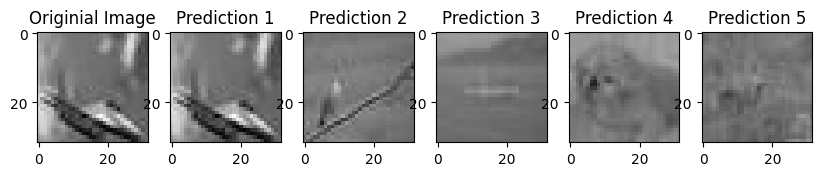

19it [00:16,  1.14it/s]


In [8]:
from numpy.ma.core import count
Z = [item[0] for item in Test_data]
test_images = np.array(Z)

k_values = [1, 3, 5, 7, 9]
# Make predictions using the trained k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
  # Replace with the best hyperparameters
knn_model.fit(X, Y)
predictions = knn_model.predict(test_images)

#GitHub and browser cannot(extremely slow) handle the load of total test images.
# Due to the limitations, only 20 images will be displayed.
count = 0
# Display the top 5 predictions for each test image
for i, test_img in tqdm(enumerate(Test_data)):
    print(f"Originial Image {i + 1}: {test_img[1]}")
    print("Top 5 Predictions:")
    distances, indices = knn_model.kneighbors([test_images[i]], n_neighbors=5)
    for j, index in enumerate(indices[0]):
        print(f"{j + 1}: Class {Y[index]}")
    print("\n")

    # Display the test image and its top predictions
    plt.figure(figsize=(10,4))
    plt.subplot(1, 6, 1)
    plt.title("Originial Image")
    original_image = test_img[0].reshape(32,32)

    # Display the original image
    plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    for j, index in enumerate(indices[0]):
        plt.subplot(1, 6, j + 2)
        plt.title(f"Prediction {j + 1}")
        # Reshape the flattened image back to (128, 128)
        original_image = X[index].reshape(32,32)
        # Display the original image
        plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    plt.show()

    count += 1
    if(count>19):break # Due to the GitHub and browser limitations